**Import Required Libraries**

In [3]:
import pandas as pd
import numpy as np


These are standard libraries for data handling (pandas) and numerical operations (numpy).

**Load Dataset**

In [4]:
df=pd.read_csv("sales_data_with_discounts.csv")

This line loads a CSV file containing sales data into a DataFrame named df.

**Initial Data Inspection**

In [5]:
df.head()

Date       Day  SKU City  Volume       BU  Brand       Model  \
0  01-04-2021  Thursday  M01    C      15  Mobiles  RealU       RU-10   
1  01-04-2021  Thursday  M02    C      10  Mobiles  RealU   RU-9 Plus   
2  01-04-2021  Thursday  M03    C       7  Mobiles   YouM       YM-99   
3  01-04-2021  Thursday  M04    C       6  Mobiles   YouM  YM-99 Plus   
4  01-04-2021  Thursday  M05    C       3  Mobiles   YouM      YM-98    

   Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      12100             181500          11.654820     21153.498820   
1      10100             101000          11.560498     11676.102961   
2      16100             112700           9.456886     10657.910157   
3      20100             120600           6.935385      8364.074702   
4       8100              24300          17.995663      4372.946230   

   Net Sales Value  
0    160346.501180  
1     89323.897039  
2    102042.089843  
3    112235.925298  
4     19927.053770

df.head() shows the first 5 rows.

In [6]:
df.dtypes

Date                  object
Day                   object
SKU                   object
City                  object
Volume                 int64
BU                    object
Brand                 object
Model                 object
Avg Price              int64
Total Sales Value      int64
Discount Rate (%)    float64
Discount Amount      float64
Net Sales Value      float64
dtype: object

df.dtypes shows the datatype of each column (e.g., int64, float64, object).

**Select Numerical Columns**

In [7]:
numerical_columns = df.select_dtypes('number').columns.tolist()

In [8]:
numerical_columns

['Volume',
 'Avg Price',
 'Total Sales Value',
 'Discount Rate (%)',
 'Discount Amount',
 'Net Sales Value']

Identifies all columns with numeric data types.

**Statistical Summary**


In [9]:

numerical_columns = ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']
desc = df[numerical_columns].describe()
mode = df[numerical_columns].mode().iloc[0]
median = df[numerical_columns].median()
desc.loc['mode'] = mode
desc.loc['median'] = median
desc = desc.reindex( ['mean', 'median','mode', 'std'])
print(desc)


          Volume     Avg Price  Total Sales Value  Discount Rate (%)  \
mean    5.066667  10453.433333       33812.835556          15.155242   
median  4.000000   1450.000000        5700.000000          16.577766   
mode    3.000000    400.000000       24300.000000           5.007822   
std     4.231602  18079.904840       50535.074173           4.220602   

        Discount Amount  Net Sales Value  
mean        3346.499424     30466.336131  
median       988.933733      4677.788059  
mode          69.177942       326.974801  
std         4509.902963     46358.656624  



*   Computes mean, median, mode, and standard deviation for selected
     numerical columns.
*   Displays a summarized statistical report.




**Histogram Plots (Distribution)**

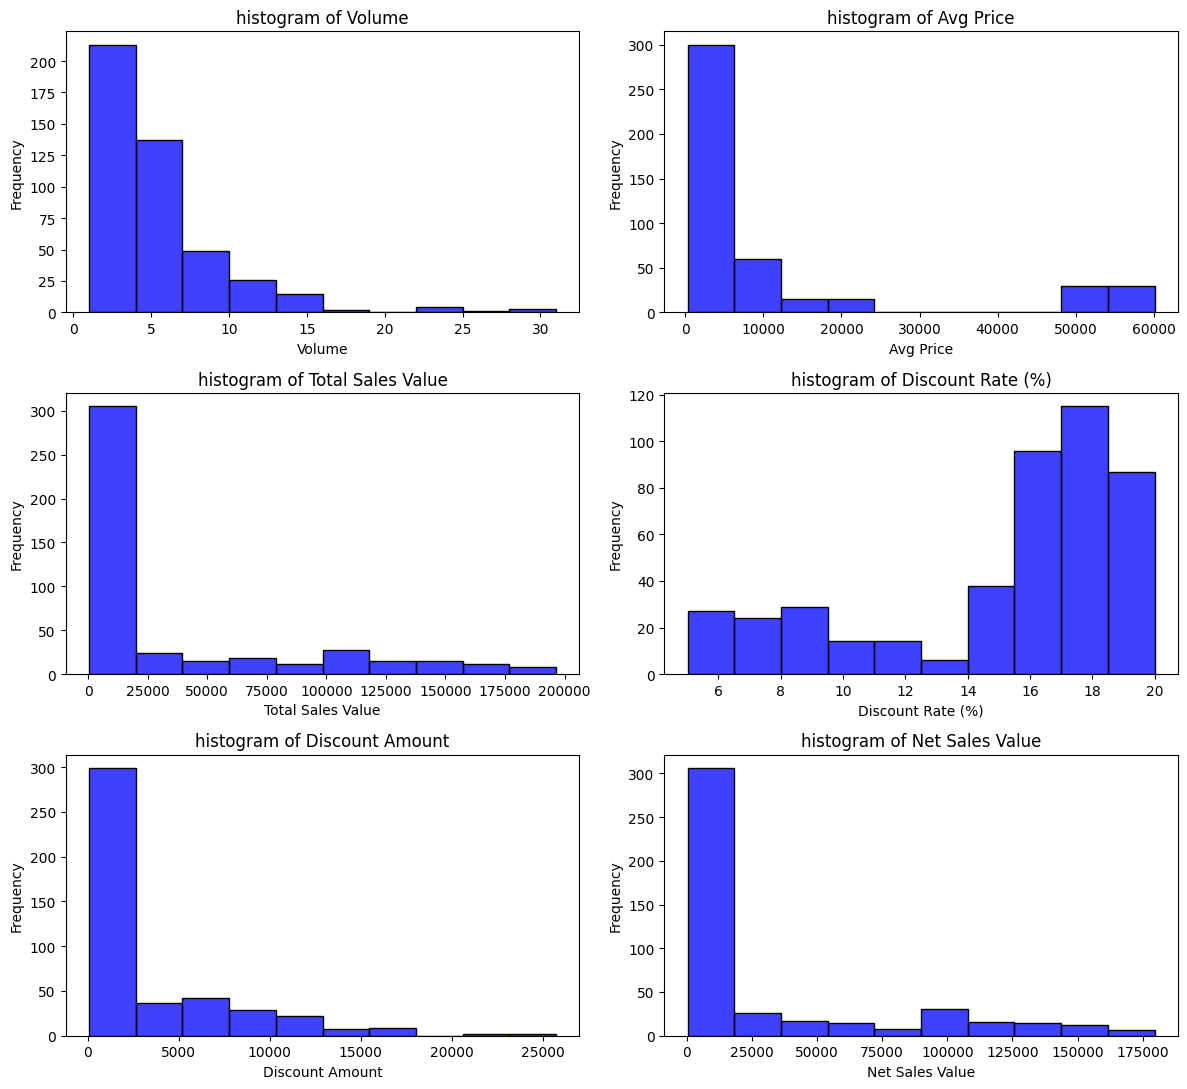

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,11))
for i,column in enumerate(numerical_columns,1):
    plt.subplot(3,2,i)
    sns.histplot(df[column],bins=10,color="blue")
    plt.title(f'histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()




*   Plots histograms for each numerical column to show the distribution (shape, skewness, etc.).



**Boxplots (Outlier Detection)**

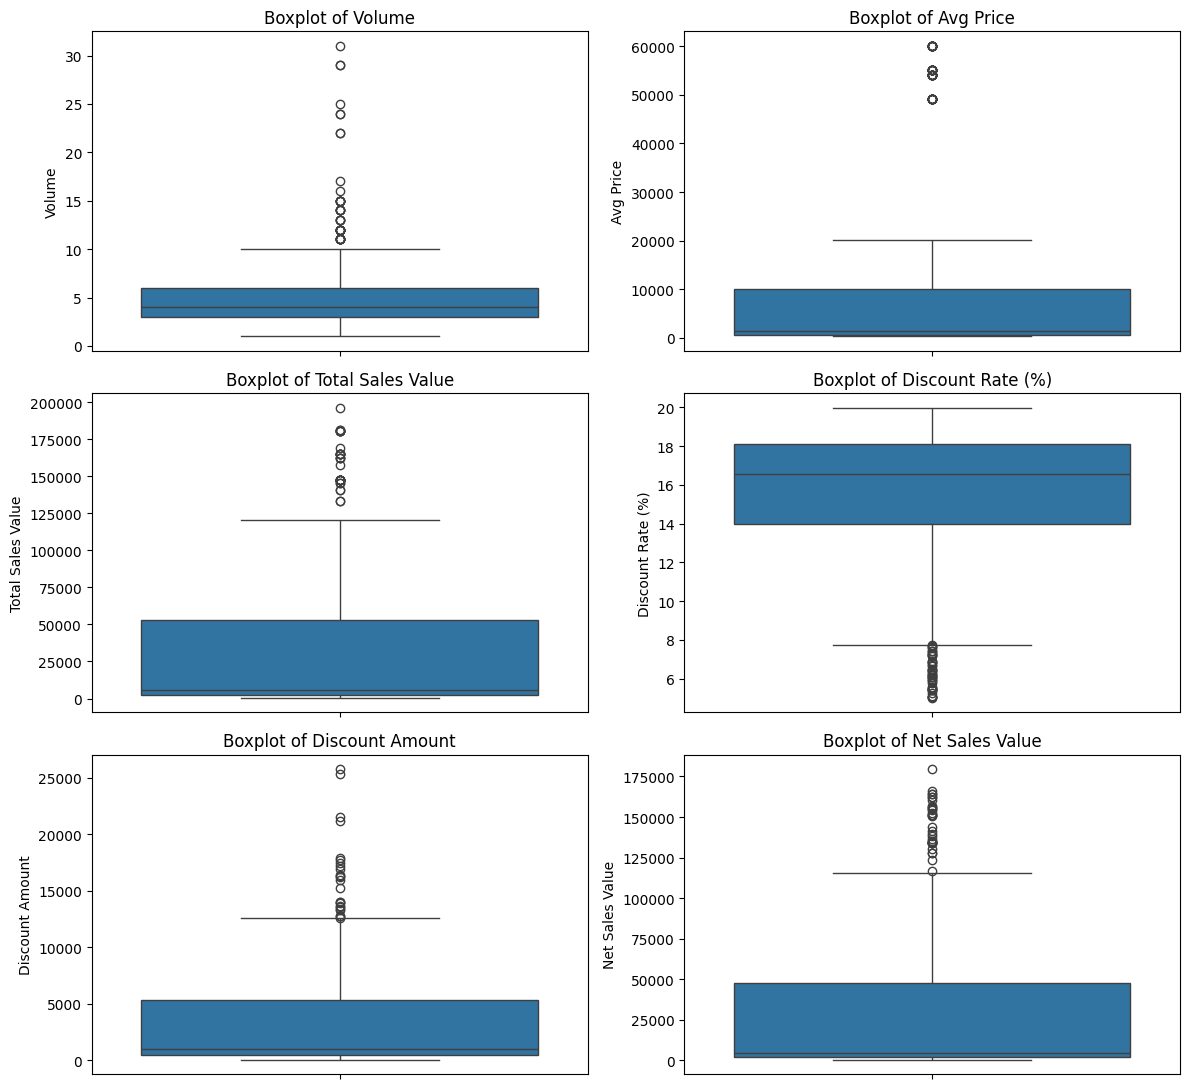

In [11]:
plt.figure(figsize=(12,11))
for i,col in enumerate(numerical_columns,1):
    plt.subplot(3,2,i)
    sns.boxplot(data=df,y=col)
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()




*   Plots boxplots for numerical columns to visually detect outliers and distribution spread.



**Identify Categorical Columns**

In [12]:
categorical_columns=df.select_dtypes('object','category').columns.tolist()

In [13]:
categorical_columns

['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']



*   Extracts names of all columns with categorical (non-numeric) data.



**Count Plots for Categorical Columns**

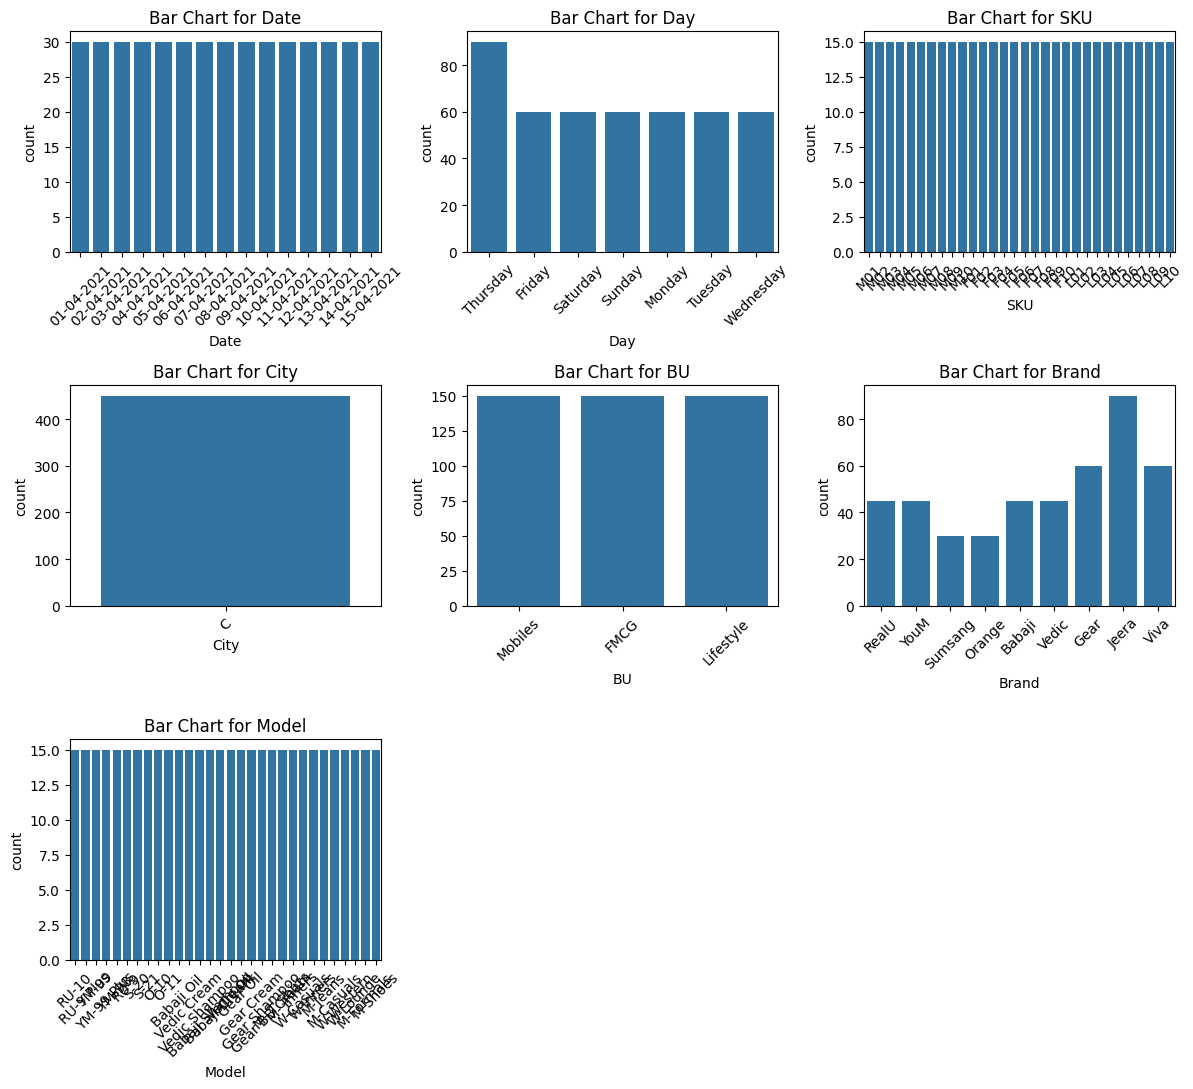

In [14]:
plt.figure(figsize=(12,11))
for i,col in enumerate(categorical_columns,1):
    plt.subplot(3,3,i)
    sns.countplot(data=df,x=col)
    plt.title(f'Bar Chart for {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




*   Shows how many times each category occurs in each categorical column using bar charts.



**Standardization of Numerical Variables**

**Concept Of Z_Score Normalization**

Z-score Normalization, also called Standardization, is a technique used to rescale data so that it has:

Mean = 0

*   Mean = 0
*   Standard Deviation = 1
Formula:
      Z=(X-𝜇)/σ

Where:


X = Original value


μ = Mean of the column


σ = Standard deviation of the column


Z = Standardized value

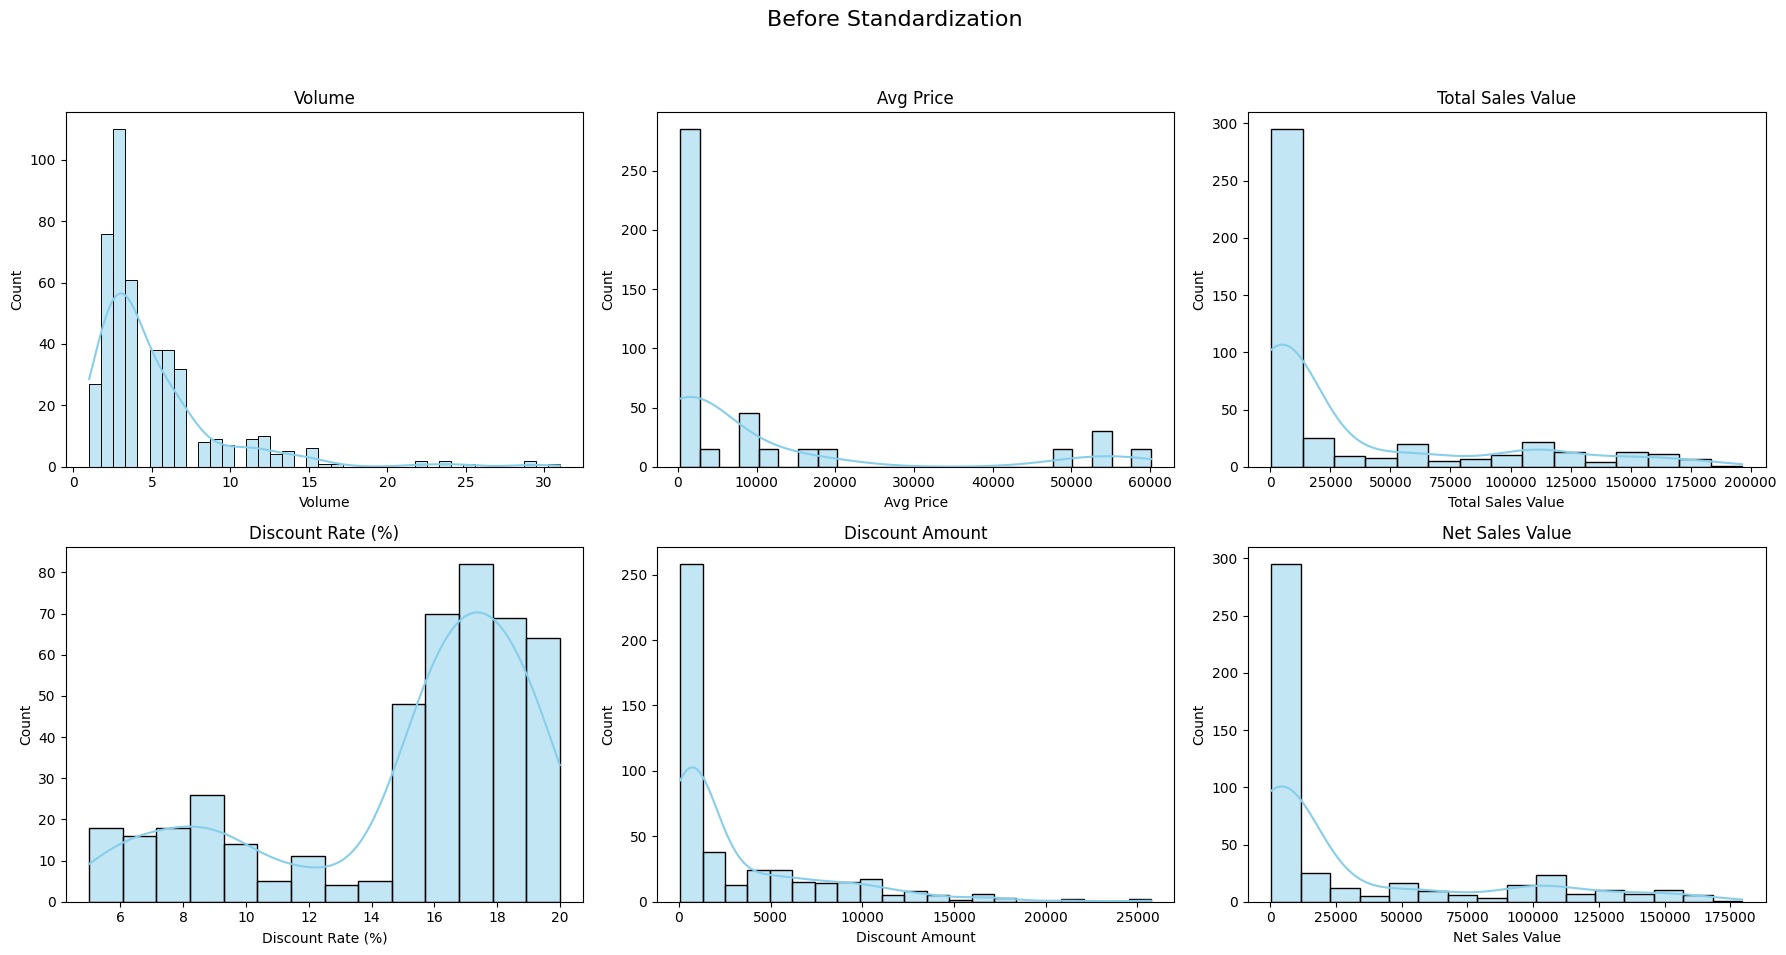

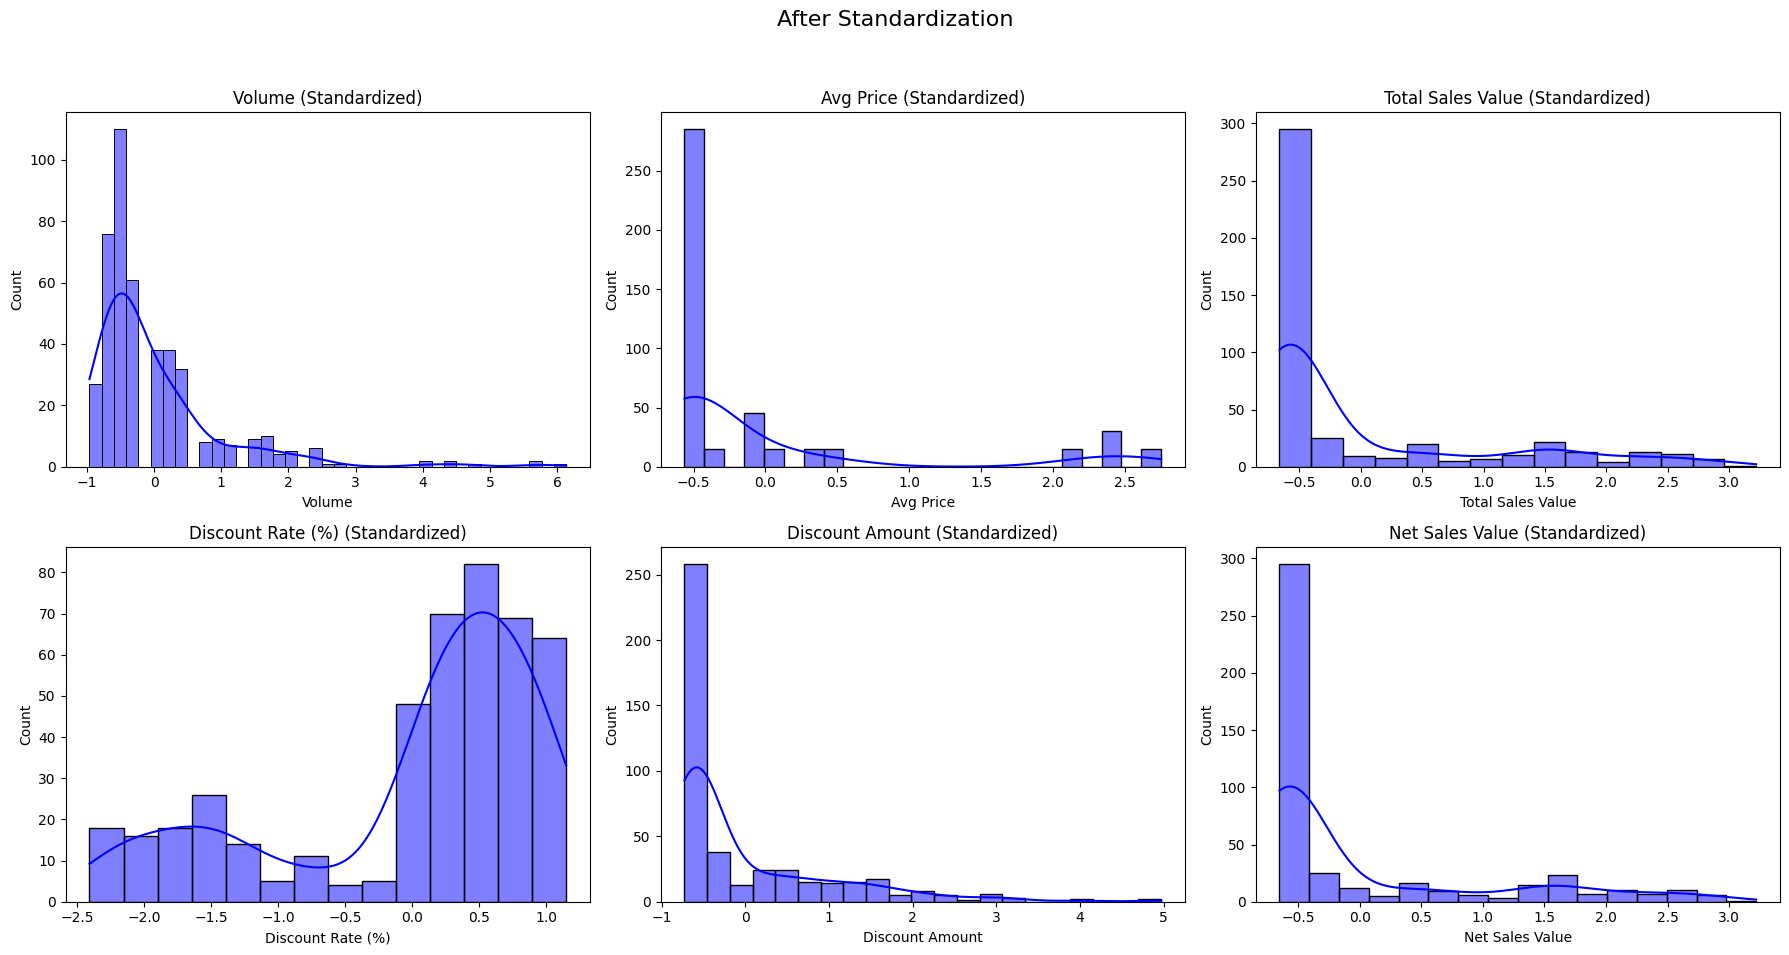

In [15]:
from sklearn.preprocessing import StandardScaler
num_cols = ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']
plt.figure(figsize=(18, 10))
plt.suptitle("Before Standardization", fontsize=16)

for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i + 1)  # 2 rows, 3 columns, current subplot index
    sns.histplot(df[col], kde=True,color='skyblue')
    plt.title(col)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Standardize numerical columns
scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[num_cols] = scaler.fit_transform(df[num_cols])

# Plot standardized distributions (After Standardization)
plt.figure(figsize=(18, 10))
plt.suptitle("After Standardization", fontsize=16)

for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_standardized[col], kde=True,color='blue')
    plt.title(col + " (Standardized)")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



The above histogram compares the distribution of six numerical features before and after Z-score standardization. In the top section, features have different ranges and scales, showing skewness and wide variation. After standardization (bottom section), all features are centered around zero with a standard deviation of one, making their scales uniform. While the shape of distributions remains, the transformation prepares the data for algorithms that are sensitive to feature scale.

**Conversion of Categorical Data into Dummy Variables**

In [16]:
#Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns,drop_first=True)
#Display a portion of the transformed dataset
print("\nTransformed Data (After One-Hot Encoding):")
print(df_encoded.head())



Transformed Data (After One-Hot Encoding):
   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  Date_02-04-2021  Date_03-04-2021  Date_04-04-2021  \
0    160346.501180            False            False            False   
1     89323.897039            False            False            False   
2    102042.089843            False            False            False   
3    112235.925298            False            False            False   
4     19927.053770            False            False            False   

   Date_05-04-2021  ...  Model_Vedic Cream

One-hot encoding converts categorical columns into binary (0/1) columns so they can be used in machine learning models. drop_first=True avoids redundancy by removing the first category to prevent multicollinearity.

**Conclusion**

The descriptive analytics and visualizations revealed important patterns in the data, such as central tendencies, variability, and feature relationships. Visual tools like box plots and heatmaps helped detect outliers and correlations. Data preprocessing played a key role—**standardization** ensured consistent scales across features, improving algorithm performance, while **one-hot encoding** allowed categorical data to be used effectively. Together, these steps enhanced the quality of analysis and model reliability.
